In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


Data Collection & Processing

In [2]:
# Load data from CSV files
calories = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [3]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
#Combining the two Dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# DATA EXPLORATION

In [6]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [7]:
# General data information
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
#Statistical summary
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
def calculate_bmr(row):
    weight = row['Weight']
    height = row['Height']  # Assuming height is in centimeters
    age = row['Age']
    if row['Gender'] == 'Male':
        return 10 * weight + 6.25 * height - 5 * age + 5
    else:
        return 10 * weight + 6.25 * height - 5 * age - 161

# Adding a new column for BMR
calories_data['BMR'] = calories_data.apply(calculate_bmr, axis=1)

In [10]:
# Drop unnecessary columns
calories_data.drop(['User_ID', 'Gender'], axis=1, inplace=True)

In [11]:
# Handle duplicate entries
print("Number of duplicate entries:", sum(calories_data.duplicated()))
calories_data.drop_duplicates(inplace=True)

Number of duplicate entries: 1


1. Positive Correlation
2. Negative Correlation

Finding the Correlation in the dataset

In [12]:
# Calculate BMI and drop height/weight columns
# calories_data['BMI'] = calories_data['Weight'] / (calories_data['Height'] ** 2)
calories_data.drop(['Height', 'Weight'], axis=1, inplace=True)

<Axes: >

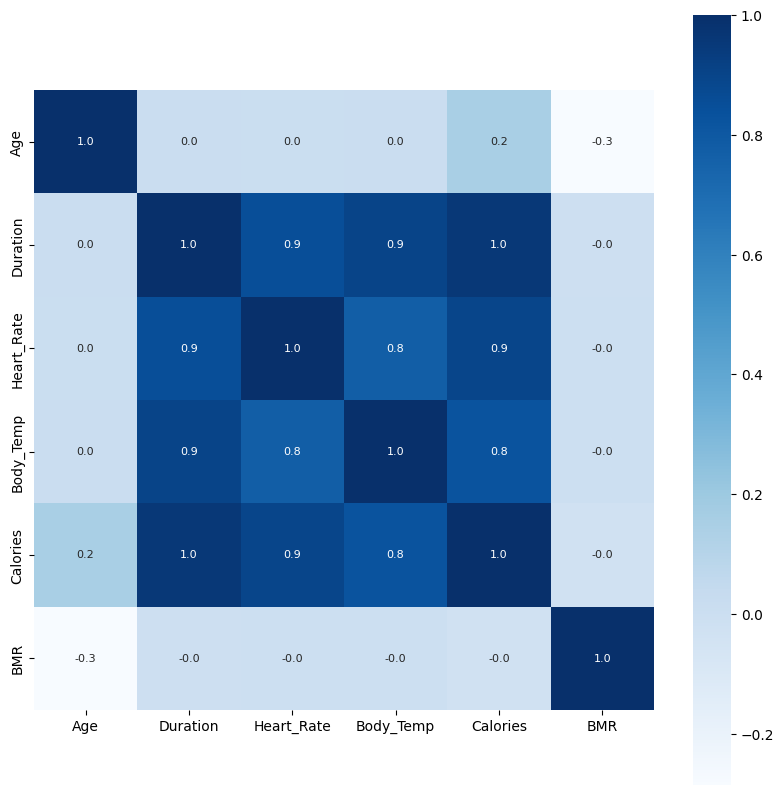

In [13]:
# constructing a heatmap to understand the correlation
correlation = calories_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# Standraization

In [14]:
# Scale the features
scaler = StandardScaler()
calories_data_scaled = scaler.fit_transform(calories_data.drop(columns=['Calories']))

Separating features and Target

In [15]:
X = calories_data_scaled
Y = calories_data['Calories']

In [16]:
print(X)

[[ 1.48465603  1.61905422  0.98934351  0.99396     0.65337085]
 [-1.34222661 -0.18404008 -0.15849588  0.35229114 -0.35889675]
 [ 1.54354942 -1.26589666 -0.7845901  -1.70104923 -0.25260865]
 ...
 [ 0.01232132  0.05637249 -0.57589202  0.09562359 -1.08266808]
 [ 2.07358991 -1.62651552 -1.20198624 -2.21438432  0.64830951]
 [ 1.19018909  0.29678507 -0.36719395  0.60895868 -0.28297668]]


In [17]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14999, dtype: float64


# Reshaping

In [18]:
y = Y.values.reshape(-1, 1)

In [19]:
print(y)

[[231.]
 [ 66.]
 [ 26.]
 ...
 [ 75.]
 [ 11.]
 [ 98.]]


# Splitting the data into training data and Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(14999, 5) (11999, 5) (3000, 5)


# Model Training

# support vector machine Regressor

In [22]:
from sklearn.svm import SVR
from scipy.stats import uniform
regressor = SVR(kernel="rbf", C=1.0, epsilon=0.1, gamma='scale') 
regressor.fit(X_train, Y_train)

SVR()

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(14999, 5) (11999, 5) (3000, 5)



# Prediction on Test Data

In [24]:
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[123.83462251  40.03450709 149.77533814 ...  46.6953426   41.43109293
  10.6571242 ]


# Visulaisation

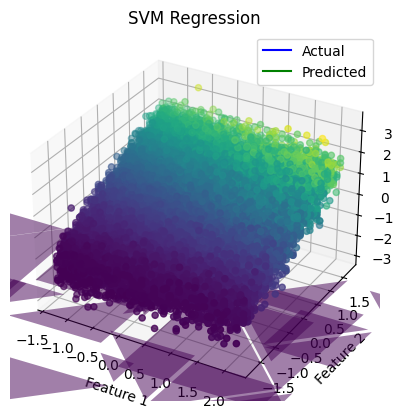

In [26]:
# Creating a meshgrid for visualization
x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
x3 = np.linspace(min(X[:, 2]), max(X[:, 2]), 10)
x4 = np.linspace(min(X[:, 3]), max(X[:, 3]), 10)
x1, x2, x3, x4 = np.meshgrid(x1, x2, x3, x4)

# Reshape the meshgrid to match the regressor's input
X_grid = np.array([x1.flatten(), x2.flatten(), x3.flatten(), x4.flatten()]).T

# Adding a dummy feature to X_grid
dummy_feature = np.ones((X_grid.shape[0], 1))  # Create a dummy feature (e.g., array of ones)
X_grid_with_dummy = np.hstack((X_grid, dummy_feature))  # Add the dummy feature to X_grid

# Predicting the target values for the updated meshgrid points
y_pred = regressor.predict(X_grid_with_dummy)

# Plotting the predicted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='Actual')
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], X_grid[:, 2], y_pred, cmap='viridis', alpha=0.5, label='Predicted')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM Regression')

# Manually creating legend handles and labels
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color='blue', label='Actual'),
                  Line2D([0], [0], color='green', label='Predicted')]

# Creating the legend
ax.legend(handles=legend_handles)

plt.show()


# Evaluate performance

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, test_data_prediction,multioutput='uniform_average')
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 3.2603316678133396
Mean Squared Error: 44.1262269753927
R-squared: 0.988550270502633


# Hinge loss

In [28]:
'''
penalizs misclassification linearly by imposing a plenalty on the margin violation
'''
def hinge_loss(y_true,y_pred):

    n_samples = len(y_true)
    loss = np.maximum(0, 1 - y_true * y_pred)
    return np.sum(loss) / n_samples


y_true = Y_test
y_pred = test_data_prediction

print("Hinge loss:", hinge_loss(y_true,y_pred))

Hinge loss: 0.0


# Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(regressor, X,Y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')


Cross-Validation Results (Accuracy): [0.98798532 0.98801809 0.98989697 0.9884515  0.98970963]
Mean Accuracy: 0.9888123018860295


# <span style="color:skyblue"> GUI : SVM </span>

# # Data description

# ..................

Input variables:

1) user_ID

2) Gender (male or female)

3) Age

4) Height

5) Weight

6) Duration

7) Heart_Rate

8) Body_Temp

output variables:

1) Calories

In [30]:
#libraries
import tkinter as tk
from tkinter import  *
from tkinter import messagebox  
import joblib
import traceback
import warnings

In [31]:
#ignore user_wrning from scaler
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:
#put trained SVM model to joblib file
joblib.dump(regressor,"SVM_model.joblib")

['SVM_model.joblib']

In [33]:
#load the trained SVM model
#check if loaded successfully
try:
    SVM_model = joblib.load('SVM_model.joblib')
    print("model loaded successfully")
except Exception as e:
    print("error loading the model: ", str(e)) 

model loaded successfully


In [34]:
#initialize & add title
root = tk.Tk()
root.title("SVM Regression GUI")

''

In [35]:
#fixed size window 1000x600 & in center 
window_width = 1000
window_height = 600

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2

root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

root.config(bg="lightblue") # background color
root.resizable(False, False)  #fixed

''

In [36]:
#GUI inputs(x)
#create header label
header = Label(root,text="(Calories_Burnt_Prediction use SVM model)",font=("Arial",20,"bold"),
               bg="lightblue",foreground="black")

#...........................
# (x) inputs labels and entry fields
labels_text = [
    "1)Age:",
    "2)Height:",
    "3)Weight:",
    "4)Duration:",
    "5)Heart_Rate:",
    "6)Body_Temp:",
    "7)Gender (male|female ):"
]
entries = []

for text in labels_text:
    label = Label(root, text=text, bg="lightblue", foreground="black", font=("Arial", 15, "bold"))
    label.pack()
    entry = Entry(root, width=10, font=("Arial", 14), bg="gray", fg="white", borderwidth=3)
    entry.pack(pady=5)
    entries.append(entry)

In [37]:
#calculate user BMR
def calculate_bmr(weight, height, age, gender):
    if gender == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    return bmr

In [38]:
#function make prediction
def predict():
    try:
        #retrieve inputs
        Age = int(entries[0].get())
        Height = float(entries[1].get())
        Weight = float(entries[2].get())
        Duration = float(entries[3].get())
        Heart_Rate = float(entries[4].get())
        Body_Temp = float(entries[5].get())
        Gender = entries[6].get().lower()

        if Gender not in ['male', 'female']:
            raise ValueError("Gender should be'male' or 'female'")
            
        if Age <= 0 or Height <= 0 or Weight <= 0 or Duration <= 0 or Heart_Rate <= 0 or Body_Temp <= 0:
            raise ValueError("invalid input value, should be postive")
            
        #calculate BMR
        bmr = calculate_bmr(Weight, Height, Age, Gender)

        #print inputs before scaling
        print("input data before scaling:", [Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Gender,bmr])

        #scale inputs
        input_data_scaled = scaler.transform([[Age, Duration,Heart_Rate,Body_Temp,bmr]])

        #print inputs after scaling
        print("input data after scaling:", input_data_scaled)
        

        #make predictions using the SVM model
        prediction = SVM_model.predict(input_data_scaled)
        print("predicted output:", prediction)
        print("........................................")

        #show prediction result
        result_label.config(text="predicted Calories Burnt: " + str(prediction[0]))

    except Exception as e:
        messagebox.showerror("error", f"error : {str(e)}")
        traceback.print_exc()  #print error traceback to console

In [39]:
#button to trigger prediction
predict_button = Button(root, text="Calories_Burnt", bg="lightgreen", activebackground="blue",
                        borderwidth=3, font=("Arial", 11, "bold"), command=predict)
predict_button.pack(pady=10)

#display prediction result
result_label = Label(root, text="result will appear here....", bg="lightblue", foreground="black", font=("Arial", 15, "bold"))
result_label.pack()

In [40]:
root.mainloop() #start GUI

input data before scaling: [68, 190.0, 94.0, 29.0, 105.0, 40.8, 'male', 1792.5]
input data after scaling: [[1.48465603 1.61905422 0.98934351 0.99396    1.32551653]]
predicted output: [216.51782731]
........................................
